# Plot

In [752]:
import numpy as np 
import pandas as pd

#Libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set(color_codes = True)
sns.set(font_scale=2)

### Importation of the dataframes

In [753]:
final_train = pd.read_csv("/Users/martinbordeau/Downloads/StudentProject2023/final_data/train_final_data.csv", sep=";")
final_verif = pd.read_csv("/Users/martinbordeau/Downloads/StudentProject2023/final_data/validation_final_data.csv", sep=";")
merge_data = pd.read_csv("/Users/martinbordeau/Downloads/StudentProject2023/processed_data/merged_data.csv", sep=";")

### Plot of the difference between AME2020 (Exp) and Duflo-Zuker model (DZ10)

In [754]:
merge_data.drop(merge_data[(merge_data["A"]<16 )].index, inplace=True)

<AxesSubplot:xlabel='A', ylabel='BE(EXP) - BE(DZ10) (MeV)'>

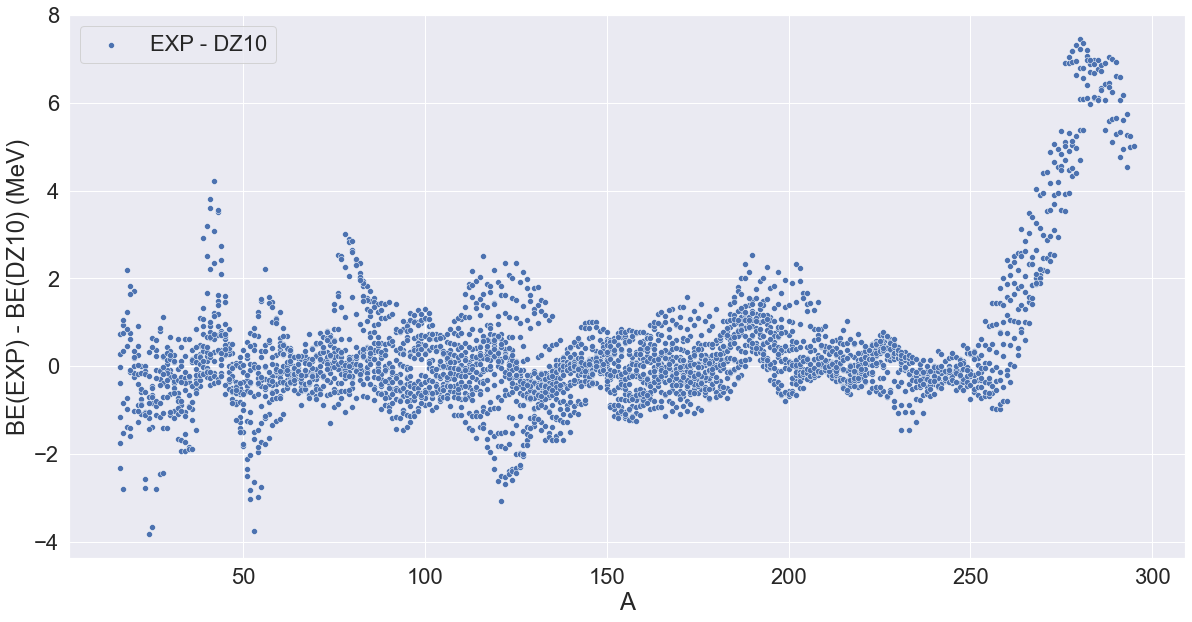

In [755]:

merge_data["Difference_BE_DZ_AME"] = merge_data["dz_BE"] - merge_data["ame_BE"]

plt.figure(figsize =(20,10))
plt.ylabel("BE(EXP) - BE(DZ10) (MeV)")

sns.scatterplot(x="A",y="Difference_BE_DZ_AME",data=merge_data, palette="rainbow_r", label="EXP - DZ10")

### Plot AME2020 (exp) - predictions and DZ10 - predictions (trained data = every nuclei excepts for five different isotopes)

RMS AME - Predict: 0.41071999134902754


<AxesSubplot:xlabel='A', ylabel='Difference (MeV)'>

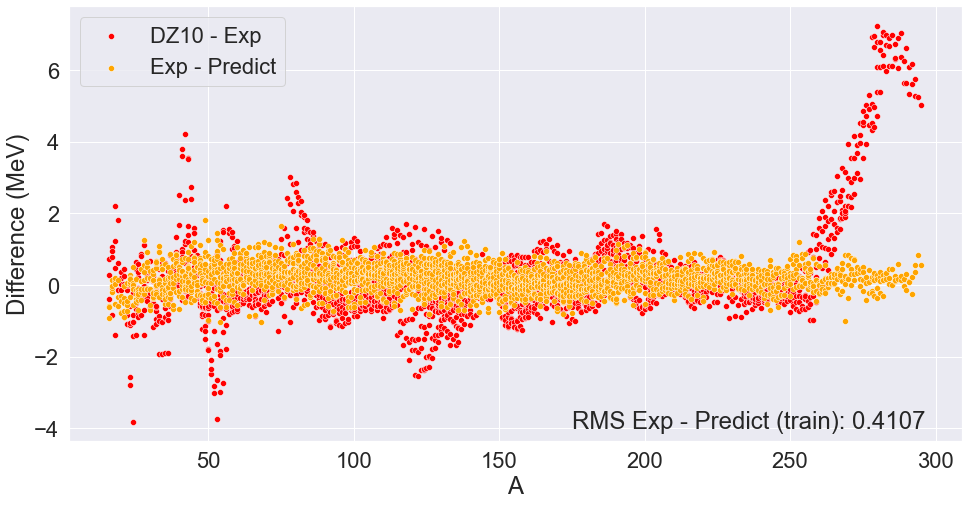

In [769]:
rms_train = np.sqrt(((final_train["Difference_BE_AME_ANN"] ** 2).sum()) / len(final_train["Difference_BE_AME_ANN"]))

print('RMS AME - Predict:', rms_train)

plt.figure(figsize =(16,8))
#plt.title("Difference between BE_AME(exp) and BE_AME(predicted) for train data")
plt.ylabel('Difference (MeV)')
plt.text(175, -4,'RMS Exp - Predict (train): {:.4f}'.format(rms_train) )

#sns.scatterplot(x="A",y="Difference_BE_DZ_AME",data=merge_data, palette="rainbow_r", label="EXP - DZ10")
sns.scatterplot(x="A",y="Difference_BE_DZ_AME",data=final_train, palette="rainbow_r", label="DZ10 - Exp", color="red")
sns.scatterplot(x="A",y="Difference_BE_AME_ANN",data=final_train, palette="rainbow_r", label="Exp - Predict", color="orange")



### Plot AME2020 (exp) - predictions and DZ10 - predictions (validation data: Z=10,38,54,68,82)

RMS AME - Predict: 1.9559465890756886


<AxesSubplot:xlabel='A', ylabel='Difference (MeV)'>

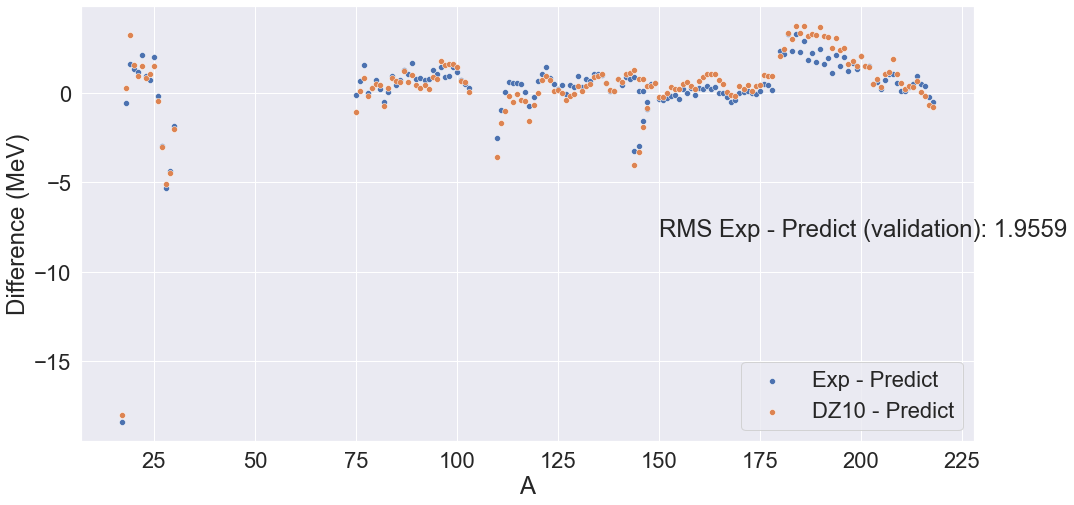

In [757]:
rms_validation = np.sqrt(((final_verif["Difference_BE_AME_ANN"] ** 2).sum()) / len(final_verif["Difference_BE_AME_ANN"]))

print('RMS AME - Predict:', rms_validation)

plt.figure(figsize =(16,8))
#plt.title("Difference between BE_AME(exp) and BE_AME(predicted) for train data")
plt.ylabel('Difference (MeV)')
plt.text(150, -8,'RMS Exp - Predict (validation): {:.4f}'.format(rms_validation) )

sns.scatterplot(x="A",y="Difference_BE_AME_ANN",data=final_verif, palette="rainbow_r", label="Exp - Predict")
sns.scatterplot(x="A",y="Difference_BE_DZ_ANN",data=final_verif, palette="rainbow_r",label="DZ10 - Predict")

### Plot 2-neutrons separation energy difference: S2n(Exp) - S2n(predictions)

<AxesSubplot:xlabel='N', ylabel='S2n(Exp) - S2n (Predict)'>

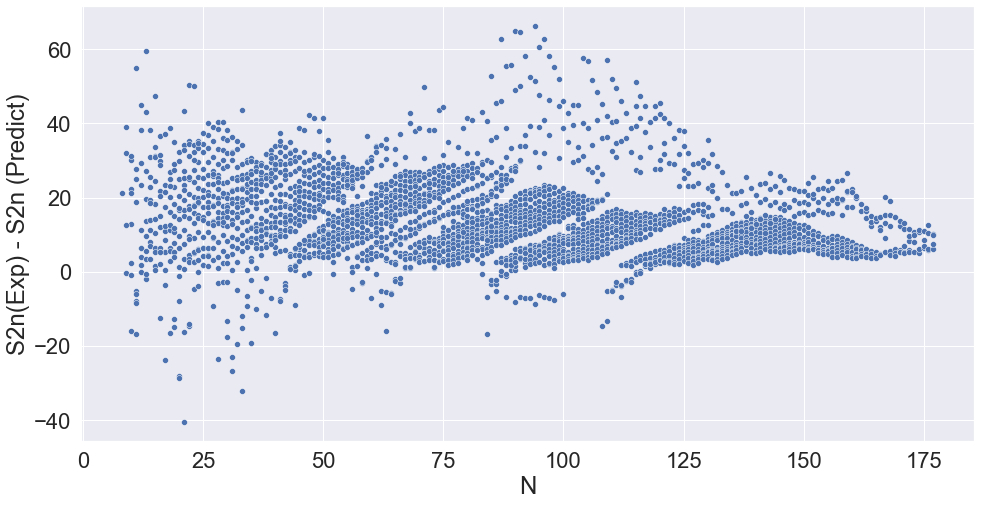

In [758]:
plt.figure(figsize =(16,8))
#plt.title("Difference between BE_AME(exp) and BE_AME(predicted) for validation")
plt.ylabel('S2n(Exp) - S2n (Predict)')

sns.scatterplot(x="N",y="Difference_S2n_AME_Predictions",data=final_train, palette="rainbow_r")

### Plot 2-neutrons separation energy difference for Z=82: S2n(Exp) - S2n(predictions)

<AxesSubplot:xlabel='A', ylabel='S2n (DZ10) - S2n (Predict)'>

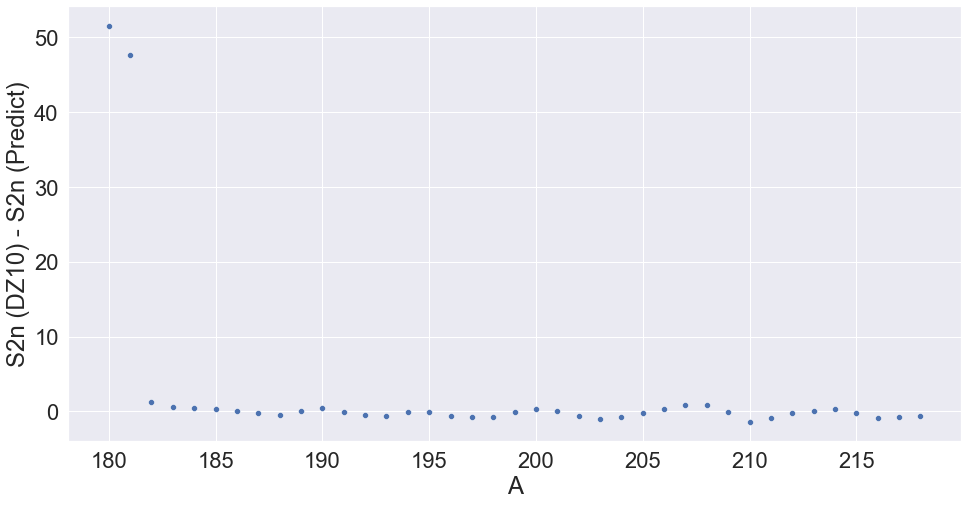

In [759]:
plt.figure(figsize =(16,8))
#plt.title("Difference between BE_AME(exp) and BE_AME(predicted) for validation")
plt.ylabel('S2n (DZ10) - S2n (Predict)')

sns.scatterplot(x="A",y="Difference_S2n_DZ_Predictions",data=final_verif[final_verif['Z']==82], palette="rainbow_r")

### Plot S2n for Z=10, 38, 54, 68, 82

In [760]:
final_verif.drop(final_verif[(final_verif["Prediction_S2n"]<0 )].index, inplace=True)
final_verif.drop(final_verif[(final_verif["Prediction_S2p"]<0 )].index, inplace=True)
final_verif.drop(final_verif[(final_verif["Prediction_S2n"]>50 )].index, inplace=True)


In [761]:
def plot_S2n(data, Z_values):

    for Z in Z_values:
        plt.figure(figsize=(16, 8))
        plt.title(" S2n for Z={}".format(Z))
        plt.ylabel('S2n (MeV)')
        plt.legend()
        sns.lineplot(x="N", y="ame_S2n", data=data[data['Z'] == Z], color="orange", label='EXP')
        sns.lineplot(x="N", y="Prediction_S2n", data=data[data['Z'] == Z], color="green", label='Prediction')
        sns.lineplot(x="N", y="dz_S2n", data=data[data['Z'] == Z], color="red", label='DZ10')
        plt.savefig("S2n_Z_{}.png".format(Z))
        plt.show()
    

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


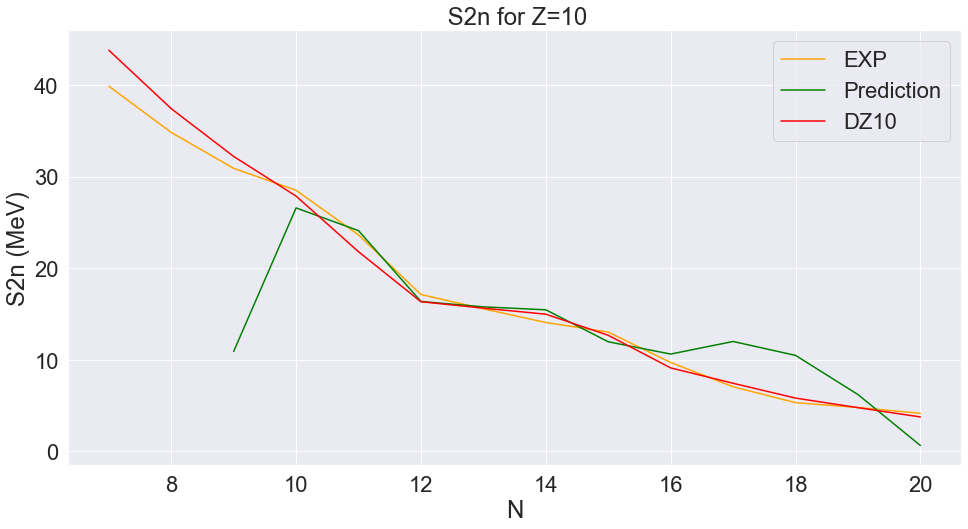

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


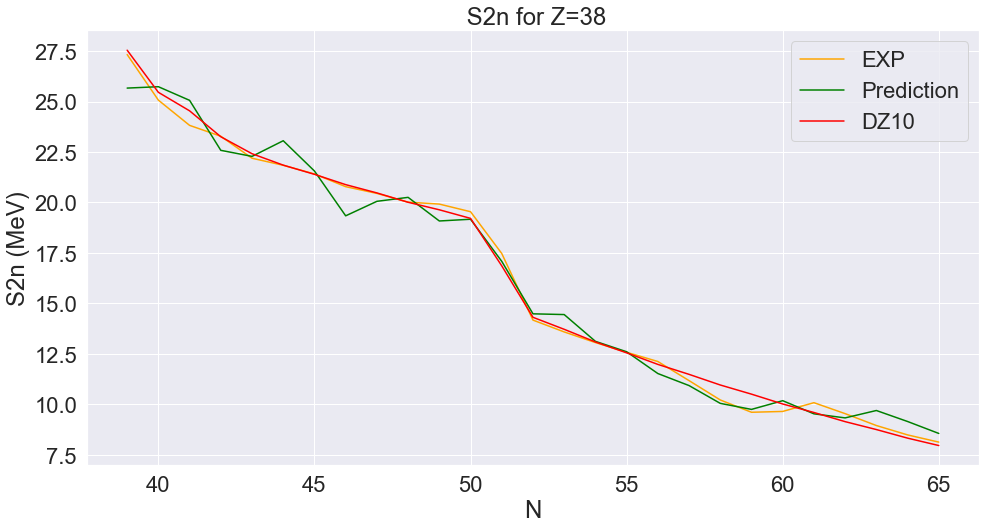

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


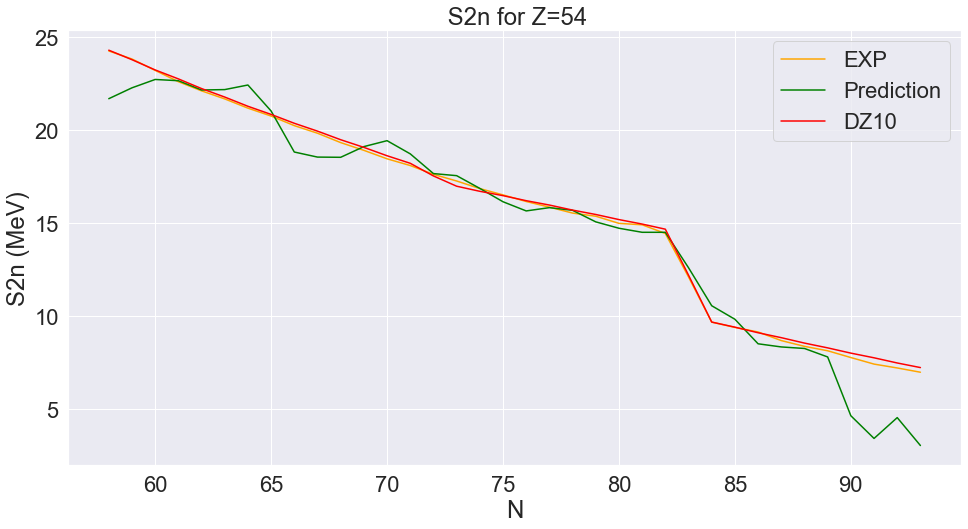

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


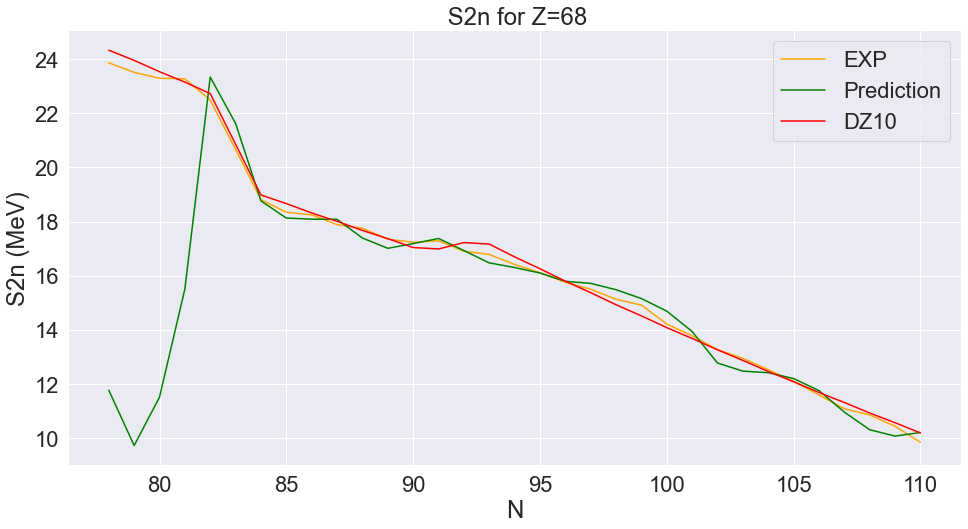

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


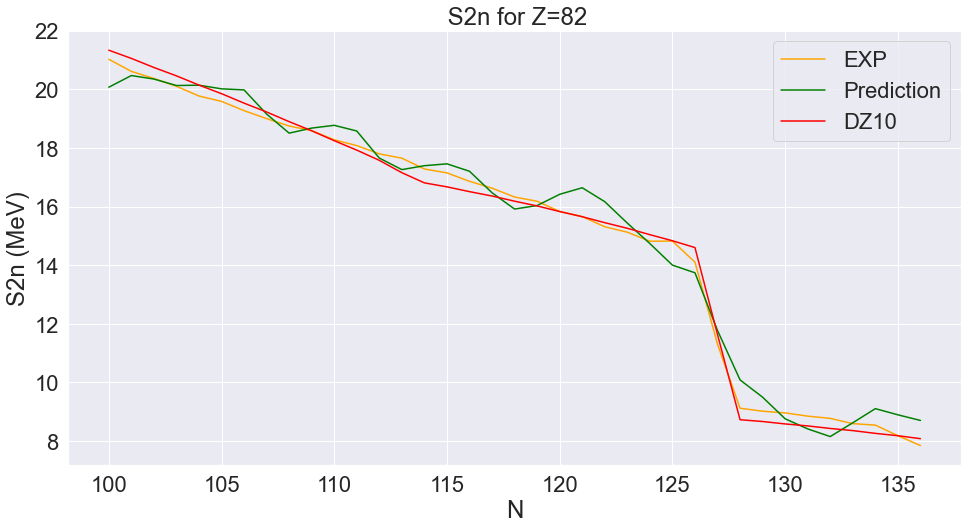

In [762]:
plot_S2n(final_verif, [10, 38, 54, 68, 82])

### Plot S2n for Z=10, 38, 54, 68, 82

In [763]:
final_verif.drop(final_verif[(final_verif["Prediction_S1n"]<0 )].index, inplace=True)
final_verif.drop(final_verif[(final_verif["Prediction_S1n"]>50 )].index, inplace=True)


def plot_S1n(data, Z_values):

    for Z in Z_values:
        plt.figure(figsize=(16, 8))
        plt.title(" S1n for Z={}".format(Z))
        plt.ylabel('S1n (MeV)')
        plt.legend()
        sns.lineplot(x="N", y="ame_S1n", data=data[data['Z'] == Z], color="black", label='EXP')
        sns.lineplot(x="N", y="Prediction_S1n", data=data[data['Z'] == Z], color="orange", label='Prediction')
        sns.lineplot(x="N", y="dz_S1n", data=data[data['Z'] == Z], color="red", label='DZ10')
        plt.savefig("S1n_Z_{}.png".format(Z))
        plt.show()
       

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


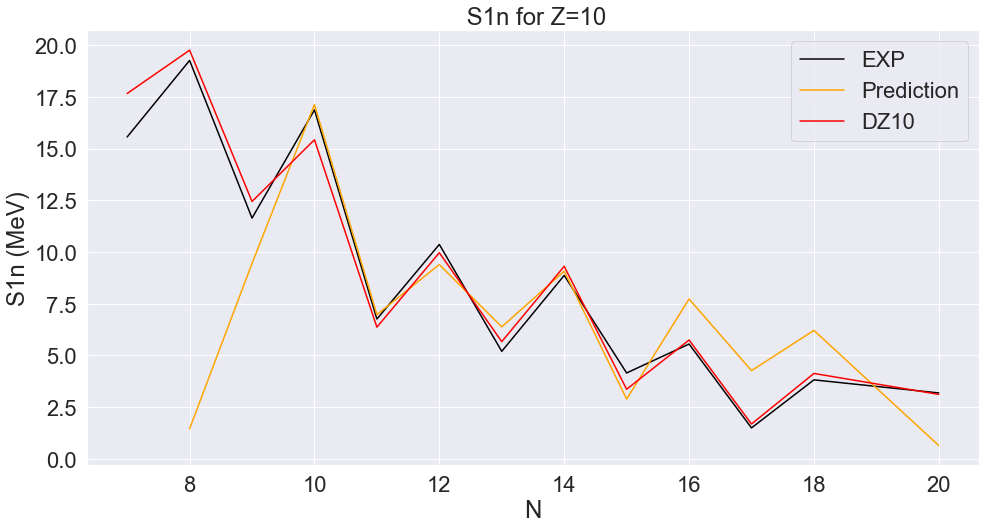

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


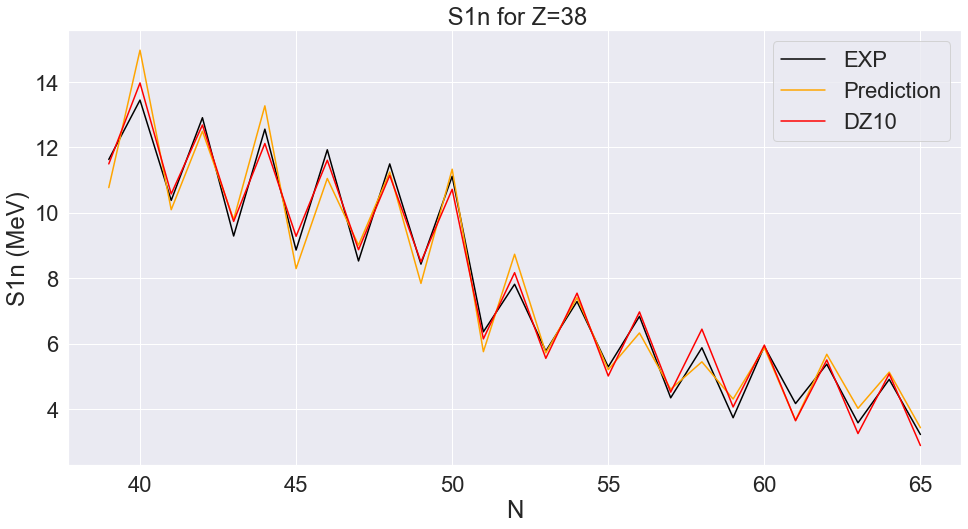

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


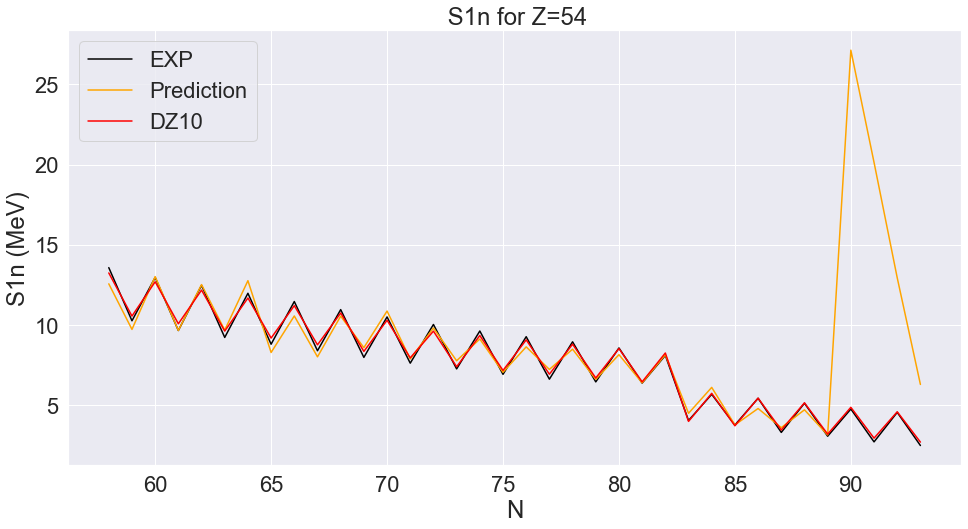

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


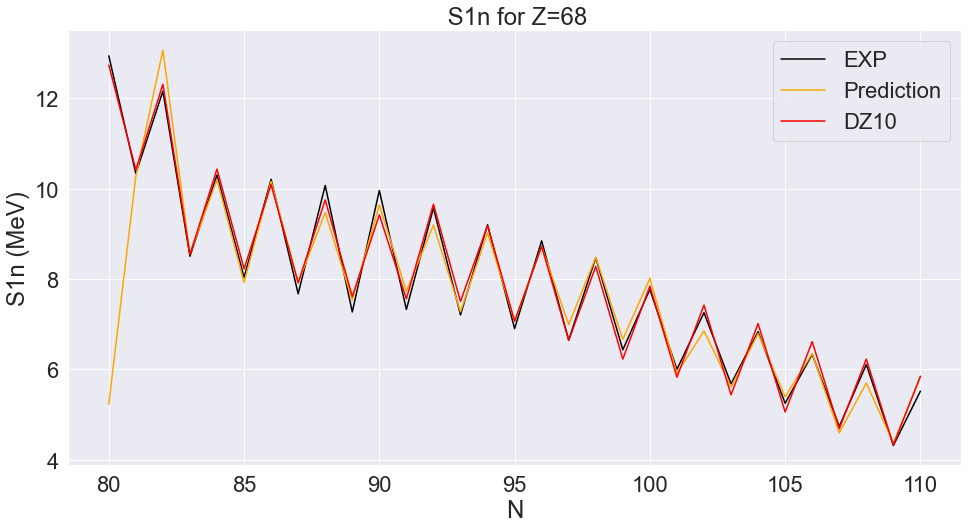

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


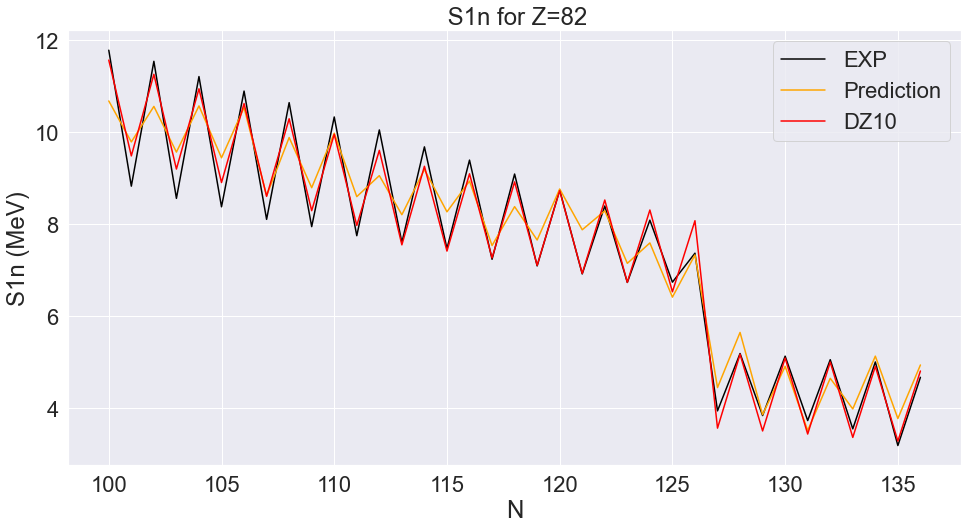

In [764]:
plot_S1n(final_verif, [10, 38, 54, 68, 82])

### Plot 2-protons separation energy difference: S2p(Exp) - S2p(predictions)

<AxesSubplot:xlabel='A', ylabel='Difference_S2p_AME_Predictions'>

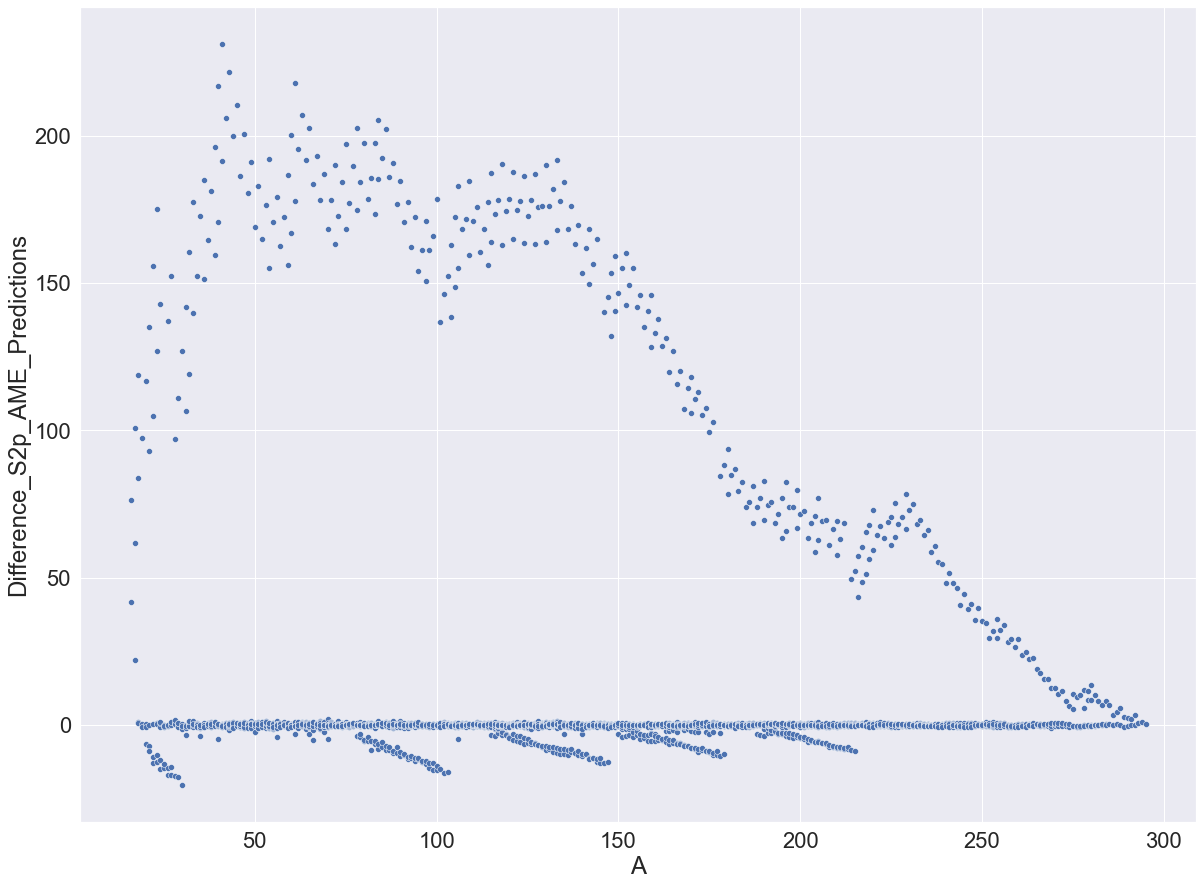

In [765]:
plt.figure(figsize =(20,15))
#plt.title("Difference between BE_AME(exp) and BE_AME(predicted) for validation")

sns.scatterplot(x="A",y="Difference_S2p_AME_Predictions",data=final_train, palette="rainbow_r")

### Plot 2-protons separation energy difference for Z=82: S2p(Exp) - S2p(predictions)

<AxesSubplot:xlabel='A', ylabel='Difference_S2p_AME_Predictions'>

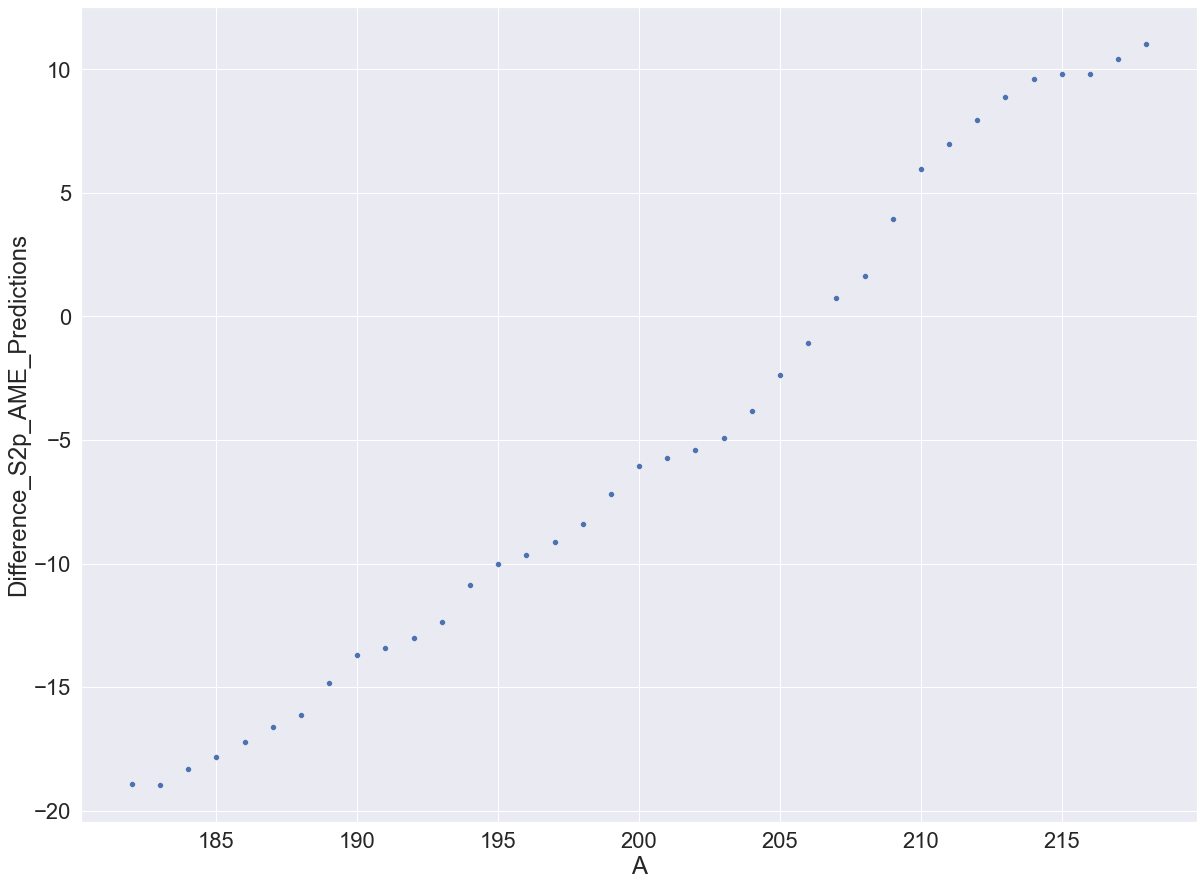

In [766]:
plt.figure(figsize =(20,15))
#plt.title("Difference between BE_AME(exp) and BE_AME(predicted) for validation")

sns.scatterplot(x="A",y="Difference_S2p_AME_Predictions",data=final_verif[final_verif['Z']==82], palette="rainbow_r")

### Plot S2p (predict)

<AxesSubplot:xlabel='N', ylabel='Prediction_S2p'>

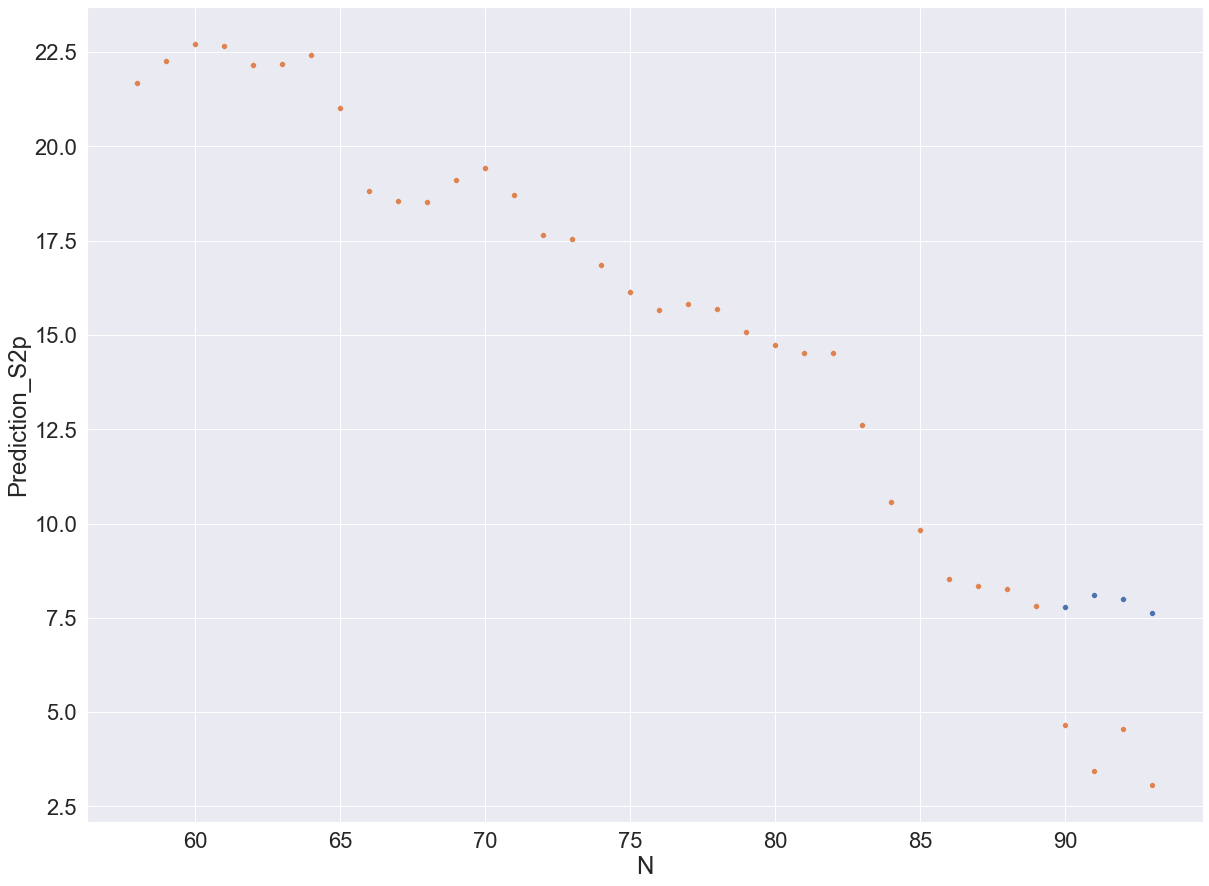

In [767]:
plt.figure(figsize =(20,15))
#plt.title("Difference between BE_AME(exp) and BE_AME(predicted) for validation")

sns.scatterplot(x="N",y="Prediction_S2p",data=final_verif[final_verif['Z']==54], palette="rainbow_r")
sns.scatterplot(x="N",y="Prediction_S2n",data=final_verif[final_verif['Z']==54], palette="rainbow_r")

In [768]:
final_verif[final_verif['Z']==54]

,Unnamed: 0.1,Unnamed: 0,Z,N,dz_BE/A,dz_ME,A,dz_BE,dz_S1n,dz_S1p,...,BE_Predictions,Difference_BE_AME_ANN,Difference_BE_DZ_ANN,Prediction_S2p,Prediction_S2n,Prediction_S1n,Difference_S2n_AME_Predictions,Difference_S2p_AME_Predictions,Difference_S2n_DZ_Predictions,Difference_S2p_DZ_Predictions
45,45,45,54.0,58.0,8.220522,-58.950806,112.0,920.698456,13.234585,2.010054,...,921.698566,0.068669,-1.000110,21.682591,21.682591,12.555490,2.563756,-19.308116,2.604656,-19.639540
46,46,46,54.0,59.0,8.241068,-61.421631,113.0,931.240672,10.542215,2.351374,...,931.409538,0.606292,-0.168866,22.266462,22.266462,9.710971,1.547368,-19.072380,1.510339,-19.395951
47,47,47,54.0,60.0,8.280046,-66.034790,114.0,943.925188,12.684517,2.836610,...,944.413775,0.555641,-0.488587,22.715209,22.715209,13.004237,0.486972,-18.618895,0.511523,-18.999416
48,48,48,54.0,61.0,8.295538,-68.025085,115.0,953.986864,10.061676,3.144981,...,954.058214,0.553382,-0.071350,22.648677,22.648677,9.644439,-0.052911,-17.761016,0.097516,-18.130859
49,49,49,54.0,62.0,8.328894,-72.118408,116.0,966.151665,12.164800,3.638637,...,966.563525,0.509509,-0.411860,22.149750,22.149750,12.505310,-0.046132,-16.414605,0.076726,-16.811663
50,50,50,54.0,63.0,8.339811,-73.653320,117.0,975.757926,9.606261,3.915648,...,976.229809,0.053010,-0.471883,22.171594,22.171594,9.666284,-0.500371,-15.471071,-0.400533,-16.056179
51,51,51,54.0,64.0,8.368027,-77.251282,118.0,987.427154,11.669229,4.417094,...,988.981337,-0.733473,-1.554183,22.417812,22.417812,12.751528,-1.242982,-15.024594,-1.142323,-15.507469
52,52,52,54.0,65.0,8.374764,-78.349670,119.0,996.596968,9.169814,4.663407,...,997.251700,-0.217102,-0.654731,21.021891,21.021891,8.270363,-0.270112,-12.744968,-0.182848,-13.358648
53,53,53,54.0,66.0,8.398251,-81.471374,120.0,1007.790070,11.193101,5.171468,...,1007.800935,0.682929,-0.010866,18.819598,18.819598,10.549236,1.416402,-9.759980,1.543317,-10.386479
54,54,54,54.0,67.0,8.401142,-82.148193,121.0,1016.538197,8.748127,5.387684,...,1015.799179,1.064566,0.739018,18.547479,18.547479,7.998243,1.281668,-8.671076,1.393749,-9.386291
